In [1]:
import numpy as np
import sys
sys.path.append("../src")
from constants import WIDTH, HEIGHT
from skimage.io import imshow, imread
%matplotlib inline

In [2]:
pred = imread("../data/test_pred/0004d4463b50_01.jpg")
refined = imread("../data/final_pred/0004d4463b50_01.jpg")

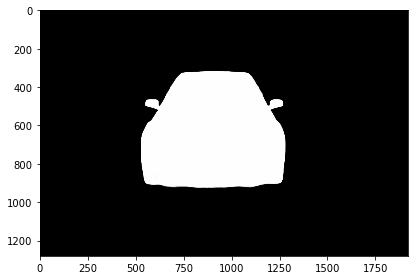

In [3]:
imshow(pred)

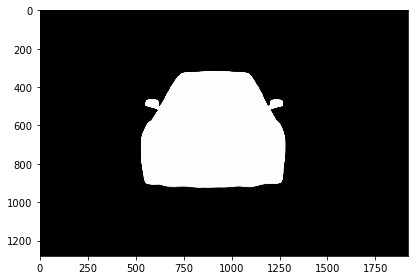

In [4]:
imshow(refined)

/home/westside/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


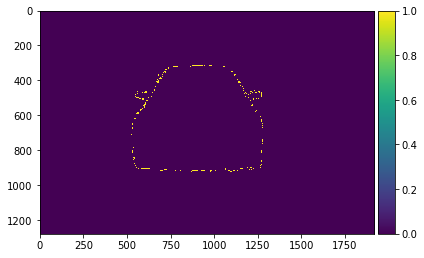

In [5]:
imshow((pred.astype('float16') - refined.astype('float16')) > 1)

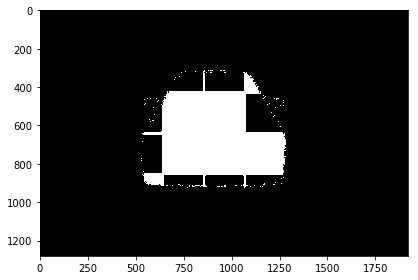

In [6]:
imshow((refined - pred) > 254)

In [7]:
import os
import pandas as pd
from rle_encoder import rle_encode
from tqdm import tqdm
from joblib import Parallel, delayed

In [9]:
def predict_image(name, threshold):
    mask = imread(f"../data/final_pred/{name}") / 256
    return rle_encode(mask > threshold)

for threshold in [0.45, 0.5, 0.55, 0.6]:
    submission = pd.read_csv("../data/sample_submission.csv")
    rles = Parallel(n_jobs=6)(delayed(predict_image)(image_name, threshold) for image_name in tqdm(submission['img'], total=submission.shape[0]))
    submission['rle_mask'] = np.array(rles)
    submission.to_csv(f"crop_submission_threshold_{threshold}.csv", index=False)


  5%|▍         | 4552/100064 [00:21<08:02, 198.15it/s]


  9%|▉         | 8792/100064 [00:43<08:00, 189.83it/s]


 13%|█▎        | 12772/100064 [01:03<07:21, 197.76it/s]


 17%|█▋        | 16832/100064 [01:23<07:07, 194.69it/s]


 21%|██        | 20802/100064 [01:44<06:52, 192.14it/s]


 25%|██▍       | 24785/100064 [02:04<06:59, 179.46it/s]


 29%|██▊       | 28742/100064 [02:25<07:07, 166.76it/s]


 33%|███▎      | 32712/100064 [02:45<05:54, 190.25it/s]


 37%|███▋      | 36892/100064 [03:06<05:37, 187.30it/s]


 41%|████      | 40912/100064 [03:27<04:56, 199.20it/s]


 45%|████▍     | 44942/100064 [03:48<04:50, 189.84it/s]


 49%|████▊     | 48762/100064 [04:08<04:45, 179.80it/s]


 53%|█████▎    | 52762/100064 [04:28<03:53, 202.53it/s]


 57%|█████▋    | 56582/100064 [04:48<04:20, 166.76it/s]


 61%|██████    | 60584/100064 [05:09<03:56, 166.59it/s]


 64%|██████▍   | 64333/100064 [05:29<03:15, 182.38it/s]


 68%|██████▊   | 68382/100064 [05:50<02:51, 184.40it/s]


 72%|███████▏  | 72462/100064 [06:11<02:18, 199.33it/s]


 76%|███████▋  | 76347/100064 [06:31<01:58, 199.81it/s]


 80%|████████  | 80512/100064 [06:53<01:40, 193.77it/s]


 85%|████████▍ | 84736/100064 [07:14<01:30, 169.92it/s]


 89%|████████▉ | 88814/100064 [07:36<01:05, 172.94it/s]


 93%|█████████▎| 92942/100064 [07:57<00:41, 173.25it/s]


 97%|█████████▋| 96812/100064 [08:17<00:17, 188.72it/s]


  1%|          | 616/100064 [00:03<10:02, 165.13it/s]


  4%|▍         | 4308/100064 [00:22<08:29, 187.98it/s]


  8%|▊         | 7884/100064 [00:40<08:21, 183.85it/s]


 11%|█▏        | 11412/100064 [00:58<07:08, 206.71it/s]


 15%|█▌        | 15060/100064 [01:17<07:03, 200.59it/s]


 19%|█▊        | 18636/100064 [01:36<06:58, 194.40it/s]


 22%|██▏       | 22060/100064 [01:54<06:41, 194.26it/s]


 26%|██▌       | 25900/100064 [02:14<06:14, 198.01it/s]


 30%|██▉       | 29586/100064 [02:34<06:26, 182.31it/s]


 33%|███▎      | 32996/100064 [02:52<05:49, 191.67it/s]


 37%|███▋      | 36556/100064 [03:11<06:30, 162.78it/s]


 40%|████      | 40228/100064 [03:30<05:32, 180.16it/s]


 44%|████▍     | 43956/100064 [03:49<04:56, 189.02it/s]


 47%|████▋     | 47382/100064 [04:08<04:38, 189.11it/s]


 51%|█████     | 50860/100064 [04:26<04:09, 197.19it/s]


 55%|█████▍    | 54956/100064 [04:48<04:04, 184.64it/s]


 58%|█████▊    | 58396/100064 [05:06<03:46, 183.79it/s]


 62%|██████▏   | 61820/100064 [05:24<03:30, 181.42it/s]


 65%|██████▌   | 65386/100064 [05:43<03:04, 187.96it/s]


 69%|██████▉   | 69068/100064 [06:03<02:43, 189.30it/s]


 72%|███████▏  | 72432/100064 [06:21<02:40, 172.40it/s]


 76%|███████▌  | 76220/100064 [06:41<02:05, 190.26it/s]


 80%|███████▉  | 79828/100064 [07:01<02:00, 167.95it/s]


 83%|████████▎ | 83268/100064 [07:19<01:36, 173.63it/s]


 87%|████████▋ | 86764/100064 [07:37<01:09, 190.05it/s]


 90%|█████████ | 90492/100064 [07:57<00:51, 185.95it/s]


 94%|█████████▍| 93964/100064 [08:15<00:32, 188.83it/s]


 97%|█████████▋| 97444/100064 [08:34<00:14, 178.45it/s]


  1%|          | 1192/100064 [00:06<08:00, 205.83it/s]


  5%|▌         | 5145/100064 [00:28<09:38, 163.99it/s]


  9%|▉         | 9282/100064 [00:50<08:10, 185.22it/s]


 13%|█▎        | 13205/100064 [01:11<07:55, 182.52it/s]


 17%|█▋        | 17333/100064 [01:32<08:51, 155.74it/s]


 21%|██        | 21186/100064 [01:53<07:33, 174.10it/s]


 25%|██▌       | 25172/100064 [02:13<06:14, 199.96it/s]


 29%|██▉       | 29092/100064 [02:34<06:05, 193.98it/s]


 33%|███▎      | 33072/100064 [02:55<06:20, 175.87it/s]


 37%|███▋      | 37282/100064 [03:17<05:43, 182.67it/s]


 41%|████▏     | 41502/100064 [03:39<04:46, 204.52it/s]


 46%|████▌     | 45692/100064 [04:00<04:41, 193.17it/s]


 50%|████▉     | 49713/100064 [04:21<04:30, 185.83it/s]


 54%|█████▎    | 53535/100064 [04:41<04:25, 175.38it/s]


 58%|█████▊    | 57597/100064 [05:02<04:02, 174.79it/s]


 62%|██████▏   | 61752/100064 [05:24<03:16, 195.32it/s]


 66%|██████▌   | 65812/100064 [05:45<02:53, 197.32it/s]


 70%|██████▉   | 69642/100064 [06:05<02:38, 191.69it/s]


 74%|███████▎  | 73613/100064 [06:25<02:30, 175.30it/s]


 78%|███████▊  | 77824/100064 [06:47<01:52, 198.03it/s]


 82%|████████▏ | 81882/100064 [07:08<01:34, 192.38it/s]


 86%|████████▌ | 85653/100064 [07:28<01:27, 164.02it/s]


 90%|████████▉ | 89592/100064 [07:48<00:57, 180.64it/s]


 94%|█████████▎| 93672/100064 [08:09<00:36, 176.92it/s]


 98%|█████████▊| 97922/100064 [08:31<00:11, 187.35it/s]


  2%|▏         | 1924/100064 [00:09<09:14, 176.98it/s]


  6%|▌         | 6212/100064 [00:32<08:36, 181.77it/s]


 10%|█         | 10454/100064 [00:54<08:51, 168.58it/s]


 14%|█▍        | 14482/100064 [01:15<07:16, 196.09it/s]


 18%|█▊        | 18392/100064 [01:35<07:30, 181.48it/s]


 22%|██▏       | 22284/100064 [01:56<07:57, 162.90it/s]


 26%|██▌       | 26263/100064 [02:16<06:16, 195.84it/s]


 30%|███       | 30452/100064 [02:38<06:10, 188.02it/s]


 35%|███▍      | 34531/100064 [03:00<06:12, 175.78it/s]


 38%|███▊      | 38482/100064 [03:20<05:34, 184.24it/s]


 42%|████▏     | 42472/100064 [03:41<05:06, 187.90it/s]


 47%|████▋     | 46716/100064 [04:04<05:39, 157.03it/s]


 51%|█████     | 50952/100064 [04:26<04:21, 188.11it/s]


 55%|█████▍    | 54862/100064 [04:47<04:02, 186.15it/s]


 59%|█████▉    | 59212/100064 [05:10<03:47, 179.33it/s]


 63%|██████▎   | 63123/100064 [05:31<03:54, 157.21it/s]


 67%|██████▋   | 67052/100064 [05:52<03:03, 179.62it/s]


 71%|███████   | 71142/100064 [06:13<02:36, 184.41it/s]


 75%|███████▌  | 75122/100064 [06:34<02:17, 180.88it/s]


 79%|███████▉  | 79482/100064 [06:57<01:48, 190.44it/s]


 83%|████████▎ | 83532/100064 [07:18<01:30, 182.14it/s]


 87%|████████▋ | 87392/100064 [07:38<01:03, 200.36it/s]


 91%|█████████▏| 91402/100064 [07:59<00:44, 196.24it/s]


 95%|█████████▌| 95492/100064 [08:20<00:27, 167.10it/s]


 99%|█████████▉| 99472/100064 [08:41<00:03, 175.28it/s]


100%|██████████| 100064/100064 [08:44<00:00, 190.65it/s]